<a href="https://colab.research.google.com/github/AdamPrzychodniPrivate/ml-poverty-prediction/blob/main/pipeline/notebooks/2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
    Run this notebook in Colab
</h1>

## Add data from repo to your disk

# Install dependencies

In [1]:
%%capture
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import logging
logging.basicConfig(level=logging.INFO)

# Load data

In [3]:
# Download data from repo :)
!wget https://raw.githubusercontent.com/AdamPrzychodniPrivate/ml-poverty-prediction/main/pipeline/data/01_raw/data.csv -O data.csv

--2023-12-30 09:29:14--  https://raw.githubusercontent.com/AdamPrzychodniPrivate/ml-poverty-prediction/main/pipeline/data/01_raw/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9115286 (8.7M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   8.69M  --.-KB/s    in 0.06s   

2023-12-30 09:29:14 (135 MB/s) - ‘data.csv’ saved [9115286/9115286]



In [4]:
df = pd.read_csv("/content/data.csv")

In [5]:
df

,Unnamed: 0,URBAN_RURA,alt,chrps,country,deathcount,latnum,longnum,lst,marketm0,...,sif,slope,tree,tt00_500k,year,stunted,wasted,healthy,poorest,underweight_bmi
0,0,1,5.60252,0.437479,Bangladesh,0,22.981516,90.155785,-1.065822,NaN,...,-0.745444,0.021781,16.3438,365.67800,2004,0.294118,0.058824,0.941176,0.071429,0.272727
1,1,1,4.67774,0.447809,Bangladesh,0,22.444431,90.329185,-0.963057,NaN,...,-0.840625,0.007349,0.0000,397.88600,2004,0.444444,0.000000,1.000000,0.062500,0.400000
2,2,1,5.14527,0.453208,Bangladesh,0,22.487263,90.206123,-0.963257,NaN,...,-0.841667,0.005347,0.0000,344.36600,2004,0.600000,0.050000,0.950000,0.000000,0.354839
3,3,1,6.17460,0.433324,Bangladesh,0,23.016359,90.192879,-1.074995,NaN,...,-0.744531,0.027679,16.0333,369.38500,2004,0.500000,0.062500,0.937500,0.062500,0.323529
4,4,1,5.39076,0.406196,Bangladesh,0,22.952404,90.454414,-1.065344,NaN,...,-0.748497,0.025029,18.7647,273.92400,2004,0.555556,0.000000,1.000000,0.111111,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333,14333,0,212.91400,0.622106,Nigeria,382,7.368560,3.937503,-0.786959,NaN,...,-0.413014,0.508662,0.0000,6.60494,2013,0.250000,0.250000,0.750000,0.000000,0.212121
14334,14334,1,392.34100,1.081900,Nigeria,311,8.570109,3.547449,-0.804163,NaN,...,-0.269682,0.396409,16.6122,271.40400,2013,0.431373,0.176471,0.784314,0.969697,0.347222
14335,14335,1,394.41600,1.080867,Nigeria,311,8.765458,3.603125,-0.780643,NaN,...,-0.248022,0.527184,15.6757,227.03800,2013,0.217391,0.000000,0.956522,0.000000,0.097561
14336,14336,1,389.46400,1.084190,Nigeria,311,8.660406,3.522780,-0.781408,NaN,...,-0.257015,0.390382,21.0244,219.00000,2013,0.195122,0.073171,0.926829,0.379310,0.026316


<h2 align="center">
    Conclusion - The Unnamed: 0 column is just an index in EDA will be deleted and will be not included in features
</h2>

In [6]:
# delete 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df

,URBAN_RURA,alt,chrps,country,deathcount,latnum,longnum,lst,marketm0,marketm1,...,sif,slope,tree,tt00_500k,year,stunted,wasted,healthy,poorest,underweight_bmi
0,1,5.60252,0.437479,Bangladesh,0,22.981516,90.155785,-1.065822,NaN,NaN,...,-0.745444,0.021781,16.3438,365.67800,2004,0.294118,0.058824,0.941176,0.071429,0.272727
1,1,4.67774,0.447809,Bangladesh,0,22.444431,90.329185,-0.963057,NaN,NaN,...,-0.840625,0.007349,0.0000,397.88600,2004,0.444444,0.000000,1.000000,0.062500,0.400000
2,1,5.14527,0.453208,Bangladesh,0,22.487263,90.206123,-0.963257,NaN,NaN,...,-0.841667,0.005347,0.0000,344.36600,2004,0.600000,0.050000,0.950000,0.000000,0.354839
3,1,6.17460,0.433324,Bangladesh,0,23.016359,90.192879,-1.074995,NaN,NaN,...,-0.744531,0.027679,16.0333,369.38500,2004,0.500000,0.062500,0.937500,0.062500,0.323529
4,1,5.39076,0.406196,Bangladesh,0,22.952404,90.454414,-1.065344,NaN,NaN,...,-0.748497,0.025029,18.7647,273.92400,2004,0.555556,0.000000,1.000000,0.111111,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333,0,212.91400,0.622106,Nigeria,382,7.368560,3.937503,-0.786959,NaN,NaN,...,-0.413014,0.508662,0.0000,6.60494,2013,0.250000,0.250000,0.750000,0.000000,0.212121
14334,1,392.34100,1.081900,Nigeria,311,8.570109,3.547449,-0.804163,NaN,NaN,...,-0.269682,0.396409,16.6122,271.40400,2013,0.431373,0.176471,0.784314,0.969697,0.347222
14335,1,394.41600,1.080867,Nigeria,311,8.765458,3.603125,-0.780643,NaN,NaN,...,-0.248022,0.527184,15.6757,227.03800,2013,0.217391,0.000000,0.956522,0.000000,0.097561
14336,1,389.46400,1.084190,Nigeria,311,8.660406,3.522780,-0.781408,NaN,NaN,...,-0.257015,0.390382,21.0244,219.00000,2013,0.195122,0.073171,0.926829,0.379310,0.026316


In [ ]:
df.columns

Index(['URBAN_RURA', 'alt', 'chrps', 'country', 'deathcount', 'latnum',
       'longnum', 'lst', 'marketm0', 'marketm1',
       ...
       'sif', 'slope', 'tree', 'tt00_500k', 'year', 'stunted', 'wasted',
       'healthy', 'poorest', 'underweight_bmi'],
      dtype='object', length=116)

# EDA

## Data description

### Target variable

Based on the features there will be 5 target variables we will try to predict

1. stunted (Child Stunting): This would correspond to the measure of children under five years of age whose height-for-age z-score is less than -2.0 standard deviations below the median, as per the WHO Child Growth Standards.

2. wasted (Child Wasting): This would refer to children under five years of age whose weight-for-height is less than -2.0 standard deviations below the median, according to the WHO Child Growth Standards.

3. healthy (Healthy Weight): Likely represents children under five years of age whose weight-for-height falls in the interval of [-2.0, 2.0] standard deviations from the median, as per the WHO Child Growth Standards.

4. poorest (Asset Poverty): This could be the indicator for asset poverty, referring to households in the poorest quintile of an asset-based comparative wealth index.

5. underweight_bmi (Underweight Women): This likely corresponds to women aged 15 to 49 whose body mass index (BMI) is less than 18.5.

In [ ]:
target_variables = ['stunted', 'wasted	healthy', 'poorest', 'underweight_bmi']

df_with_target_variables = df[['stunted', 'wasted', 'healthy', 'poorest', 'underweight_bmi']]

In [ ]:
df_with_target_variables

,stunted,wasted,healthy,poorest,underweight_bmi
0,0.294118,0.058824,0.941176,0.071429,0.272727
1,0.444444,0.000000,1.000000,0.062500,0.400000
2,0.600000,0.050000,0.950000,0.000000,0.354839
3,0.500000,0.062500,0.937500,0.062500,0.323529
4,0.555556,0.000000,1.000000,0.111111,0.277778
...,...,...,...,...,...
14333,0.250000,0.250000,0.750000,0.000000,0.212121
14334,0.431373,0.176471,0.784314,0.969697,0.347222
14335,0.217391,0.000000,0.956522,0.000000,0.097561
14336,0.195122,0.073171,0.926829,0.379310,0.026316


### Features

- 'URBAN_RURA': Indicates whether a location is in an urban or rural setting, important for understanding geographical and socio-economic differences.
- 'alt': Represents the altitude of a location, impacting climate and environmental conditions.
- 'chrps': Refers to the Climate Hazards Group InfraRed Precipitation with Station data, providing rainfall estimates crucial for agricultural and climate studies.
- 'country'
- 'deathcount': Counts the number of deaths in a given area or period, significant for public health and safety analysis.
- 'latnum'
- 'longnum'
- 'lst': Stands for Land Surface Temperature, key for environmental and climate studies.
'markets0' to 'markets47': Represents a series of variables related to market food prices, essential for understanding economic and food security aspects.
- 'numevents': Counts the number of violent or significant events, used to assess factors like conflict and political instability impacting food security and poverty.
- 'pasture': Indicates pasture coverage, relevant in agricultural land use and environmental studies.
- 'sif': Stands for Solar-Induced chlorophyll Fluorescence, a measure of plant photosynthetic activity, important in agricultural and ecological research.
- 'slope': Measures the steepness or gradient of land, relevant in geographical and environmental analyses.
- 'tree': Indicates tree coverage or density, significant for environmental, ecological, and climate studies.
- 'tt00_500k': Represents travel time or accessibility to urban centers, important for understanding remoteness and its socio-economic impacts.
- 'year': Denotes the year of the data collection, crucial for temporal analysis and understanding trends over time.


## Data profiling

In [ ]:
def data_profiling(df: pd.DataFrame, name: str = "data_profiling_report",
                   interface: str = "html", num_columns: int = None, chunk_size: int = 30) -> None:
    """
    This function generates a data profiling report using the pandas_profiling package.

    Args:
        df (pd.DataFrame): The DataFrame to profile.
        name (str, optional): The title of the profile report. Defaults to "data_profiling_report".
        interface (str, optional): The format of the report. Defaults to "html".
                                    Choose between 'html' or 'widget'.
        num_columns (int, optional): Number of columns to include in the report. If None, profiles in chunks of 30 columns.
        chunk_size (int, optional): Size of each chunk for profiling when num_columns is None. Defaults to 30.

    Raises:
        ValueError: If df is not a pandas DataFrame or name is not a string or
                    if interface is not 'html' or 'widget'.
    """

    # Check if df is a pandas DataFrame
    if not isinstance(df, pd.DataFrame):
        raise ValueError("df should be a pandas DataFrame")

    # Check if name is a string
    if not isinstance(name, str):
        raise ValueError("name should be a string")

    # Check if interface is a string and a valid option
    if not isinstance(interface, str) or interface not in ['html', 'widget']:
        raise ValueError("interface should be a string, either 'html' or 'widget'")

    # If num_columns is specified, profile only that many columns
    if num_columns is not None:
        if not isinstance(num_columns, int) or num_columns <= 0:
            raise ValueError("num_columns should be a positive integer")
        columns_to_profile = df.columns[:num_columns]
        df = df[columns_to_profile]
        create_profile(df, name, interface)
    else:
        # If num_columns is not specified, profile in chunks
        for start_col in range(0, len(df.columns), chunk_size):
            end_col = min(start_col + chunk_size, len(df.columns))
            chunk_columns = df.columns[start_col:end_col]
            chunk_df = df[chunk_columns]
            chunk_name = f"{name}_{start_col + 1}-{end_col}"
            create_profile(chunk_df, chunk_name, interface)

def create_profile(df, report_name, interface):
    """ Helper function to create and save the profile report. """
    profile = ProfileReport(df, title=report_name, explorative=True)
    if interface == "html":
        profile.to_file(f"{report_name}.html")
        logging.info(f"Report {report_name} generated in html format, check files.")
    elif interface == "widget":
        logging.info(f"Report {report_name} will be generated as a widget, it might take a while.")
        profile.to_widgets()

# Example usage
# data_profiling(df)
# data_profiling(df, num_columns=5)
# data_profiling(df, specific_columns=['column1', 'column2'])

In [ ]:
# data_profiling(df)

## Data types

In [ ]:
def categorize_feature_counts(df):
    """
    Counts and categorizes the features in a Pandas DataFrame into numerical and categorical types.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    dict: A dictionary with counts of numerical and categorical features.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    categorical = df.select_dtypes(include=['object', 'category']).shape[1]
    numerical = df.select_dtypes(include=['int64', 'float64']).shape[1]

    return {"categorical": categorical, "numerical": numerical}

# Example usage
# categorize_feature_counts(df)

In [ ]:
# There is only one categorical variable which is 'URBAN_RURA' is used to diffrentiate between urban and rural areas with 1 is urban 0 is rural
categorize_feature_counts(df)

{'categorical': 1, 'numerical': 115}

In [ ]:
df

,URBAN_RURA,alt,chrps,country,deathcount,latnum,longnum,lst,marketm0,marketm1,...,sif,slope,tree,tt00_500k,year,stunted,wasted,healthy,poorest,underweight_bmi
0,1,5.60252,0.437479,Bangladesh,0,22.981516,90.155785,-1.065822,NaN,NaN,...,-0.745444,0.021781,16.3438,365.67800,2004,0.294118,0.058824,0.941176,0.071429,0.272727
1,1,4.67774,0.447809,Bangladesh,0,22.444431,90.329185,-0.963057,NaN,NaN,...,-0.840625,0.007349,0.0000,397.88600,2004,0.444444,0.000000,1.000000,0.062500,0.400000
2,1,5.14527,0.453208,Bangladesh,0,22.487263,90.206123,-0.963257,NaN,NaN,...,-0.841667,0.005347,0.0000,344.36600,2004,0.600000,0.050000,0.950000,0.000000,0.354839
3,1,6.17460,0.433324,Bangladesh,0,23.016359,90.192879,-1.074995,NaN,NaN,...,-0.744531,0.027679,16.0333,369.38500,2004,0.500000,0.062500,0.937500,0.062500,0.323529
4,1,5.39076,0.406196,Bangladesh,0,22.952404,90.454414,-1.065344,NaN,NaN,...,-0.748497,0.025029,18.7647,273.92400,2004,0.555556,0.000000,1.000000,0.111111,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333,0,212.91400,0.622106,Nigeria,382,7.368560,3.937503,-0.786959,NaN,NaN,...,-0.413014,0.508662,0.0000,6.60494,2013,0.250000,0.250000,0.750000,0.000000,0.212121
14334,1,392.34100,1.081900,Nigeria,311,8.570109,3.547449,-0.804163,NaN,NaN,...,-0.269682,0.396409,16.6122,271.40400,2013,0.431373,0.176471,0.784314,0.969697,0.347222
14335,1,394.41600,1.080867,Nigeria,311,8.765458,3.603125,-0.780643,NaN,NaN,...,-0.248022,0.527184,15.6757,227.03800,2013,0.217391,0.000000,0.956522,0.000000,0.097561
14336,1,389.46400,1.084190,Nigeria,311,8.660406,3.522780,-0.781408,NaN,NaN,...,-0.257015,0.390382,21.0244,219.00000,2013,0.195122,0.073171,0.926829,0.379310,0.026316


## Missing data

In [ ]:
import pandas as pd

def summarize_missing_values_with_display_option(df, display_all_rows=False):
    """
    Summarize missing values in the DataFrame, showing columns with missing values in descending order,
    and providing a summary of how many columns have and don't have missing values.
    Optionally displays all rows of the summary DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        display_all_rows (bool): If True, display all rows of the summary. Default is False.

    Returns:
        pd.DataFrame, int, int: A DataFrame with columns and their missing values count,
                                count of columns with missing values,
                                count of columns without missing values.
    """
    # Option to display all rows
    if display_all_rows:
        pd.set_option('display.max_rows', None)

    # Count missing values for each column
    missing_values = df.isnull().sum()

    # Filter out columns with no missing values and sort in descending order
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
    missing_values_summary = pd.DataFrame(missing_values, columns=['Missing Values'])

    # Count of columns with and without missing values
    total_columns_with_missing = missing_values_summary.shape[0]
    total_columns_without_missing = df.shape[1] - total_columns_with_missing

    # Display the summary DataFrame
    print(missing_values_summary)
    print(f"Total columns with missing values: {total_columns_with_missing}")
    print(f"Total columns without missing values: {total_columns_without_missing}")

    # Reset display option to default
    if display_all_rows:
        pd.reset_option('display.max_rows')

# Example usage
# summarize_missing_values_with_display_option(df)
# summarize_missing_values_with_display_option(df, display_all_rows=True)



In [ ]:
summarize_missing_values_with_display_option(df, display_all_rows=True)

                 Missing Values
marketm36                 14334
markets36                 14334
markets44                 13924
marketm44                 13924
marketm46                 13920
marketm38                 13920
markets46                 13920
markets38                 13920
markets30                 13867
marketm30                 13867
marketm45                 13518
markets45                 13518
marketm42                 13518
marketm43                 13518
markets43                 13518
marketm37                 13518
marketm39                 13518
marketm40                 13518
marketm47                 13518
marketm41                 13518
markets37                 13518
markets47                 13518
markets41                 13518
markets40                 13518
markets39                 13518
markets42                 13518
marketm29                 13496
markets29                 13496
marketm31                 13472
markets31                 13472
marketm1

In [ ]:
import pandas as pd
import plotly.express as px

def plot_missing_values_histogram(df):
    """
    Create a Plotly histogram to visualize the distribution of missing values across columns in descending order.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        plotly.graph_objs._figure.Figure: A histogram of missing values.
    """
    # Calculate missing values for each column
    missing_values = df.isnull().sum()

    # Filter to include only columns with missing values
    missing_values = missing_values[missing_values > 0]

    # Sort the missing values in descending order
    missing_values = missing_values.sort_values(ascending=False)

    # Create a DataFrame for plotting
    missing_data_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})

    # Create a histogram using Plotly
    fig = px.histogram(missing_data_df, x='Missing Values', y='Column', orientation='h',
                       title='Histogram of Missing Values per Column (Descending Order)')
    fig.update_layout(xaxis_title='Number of Missing Values', yaxis_title='Columns')

    return fig

# Example usage:
# fig = plot_missing_values_histogram(df)
# fig.show()


In [ ]:
fig = plot_missing_values_histogram(df)
fig.show()


In [ ]:
import pandas as pd

def count_rows_with_missing_values(df):
    """
    Counts the number of rows in a DataFrame that have missing values.

    :param df: pandas DataFrame
    :return: int, number of rows with missing values
    """
    # Check if DataFrame is empty
    if df.empty:
        print("The DataFrame is empty.")
        return 0

    missing_values_count = df.isnull().any(axis=1).sum()

    # Informative print statement
    print(f"Number of rows with missing values: {missing_values_count}")

# Example usage:
# count_rows_with_missing_values(df)


In [ ]:
count_rows_with_missing_values(df)

Number of rows with missing values: 14338


so all xD so i need to perform some processing to choose what to delete

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def explore_missing_values(df):
    """
    Analyzes and visualizes the pattern of missing values in a pandas DataFrame.

    This function calculates the percentage of missing values in each column of 'df',
    and visualizes the missing data using a heatmap for overall missing data.

    Parameters:
    - df (pandas.DataFrame): The DataFrame to analyze for missing values.

    Returns:
    - None: The function outputs visualizations and does not return any value.

    Usage:
    - explore_missing_values(df)

    Note: The function requires pandas, matplotlib, and seaborn libraries. Ensure
    these are installed and imported before using the function.
    """

    # Temporarily change pandas display option to show all rows
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        # Percentage of missing values
        missing_percent = (df.isnull().sum() / len(df)) * 100
        missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
        print("Percentage of Missing Values per Column:\n", missing_percent)

    # Missing data heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Heatmap of Missing Values")
    plt.show()

# Example usage:
# explore_missing_values(df)


Percentage of Missing Values per Column:
 marketm1    39.538832
markets1    39.538832
marketm2    30.987410
markets2    30.987410
marketm0    30.039610
markets0    30.039610
marketm3    27.387183
markets3    27.387183
lst          4.031688
sif          1.556090
chrps        1.414627
dtype: float64


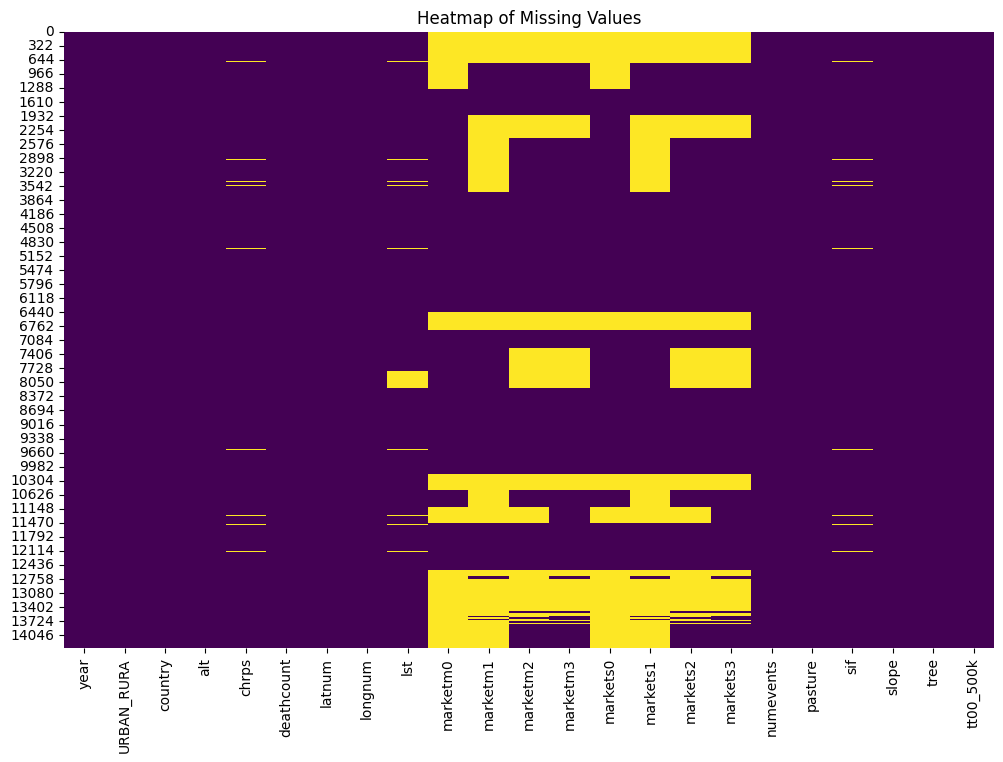

In [21]:
explore_missing_values(df)

In [ ]:
!pip install missingno


^C


In [17]:
# List of features to keep
features = [
    'year',
    'URBAN_RURA',
    'country',
    'alt',
    'chrps',
    'deathcount',
    'latnum',
    'longnum',
    'lst',
    'marketm0',
    'marketm1',
    'marketm2',
    'marketm3',
    'markets0',
    'markets1',
    'markets2',
    'markets3',
    'numevents',
    'pasture',
    'sif',
    'slope',
    'tree',
    'tt00_500k'
]


In [18]:
# Select only the columns specified in 'features' from the DataFrame
df = df[features]

In [19]:
df

,year,URBAN_RURA,country,alt,chrps,deathcount,latnum,longnum,lst,marketm0,...,markets0,markets1,markets2,markets3,numevents,pasture,sif,slope,tree,tt00_500k
0,2004,1,Bangladesh,5.60252,0.437479,0,22.981516,90.155785,-1.065822,NaN,...,NaN,NaN,NaN,NaN,14,0.048795,-0.745444,0.021781,16.3438,365.67800
1,2004,1,Bangladesh,4.67774,0.447809,0,22.444431,90.329185,-0.963057,NaN,...,NaN,NaN,NaN,NaN,14,0.042821,-0.840625,0.007349,0.0000,397.88600
2,2004,1,Bangladesh,5.14527,0.453208,0,22.487263,90.206123,-0.963257,NaN,...,NaN,NaN,NaN,NaN,14,0.030075,-0.841667,0.005347,0.0000,344.36600
3,2004,1,Bangladesh,6.17460,0.433324,0,23.016359,90.192879,-1.074995,NaN,...,NaN,NaN,NaN,NaN,14,0.052236,-0.744531,0.027679,16.0333,369.38500
4,2004,1,Bangladesh,5.39076,0.406196,0,22.952404,90.454414,-1.065344,NaN,...,NaN,NaN,NaN,NaN,14,0.041699,-0.748497,0.025029,18.7647,273.92400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333,2013,0,Nigeria,212.91400,0.622106,382,7.368560,3.937503,-0.786959,NaN,...,NaN,NaN,67.294732,43.418321,345,0.004750,-0.413014,0.508662,0.0000,6.60494
14334,2013,1,Nigeria,392.34100,1.081900,311,8.570109,3.547449,-0.804163,NaN,...,NaN,NaN,113.518022,43.772564,296,0.001639,-0.269682,0.396409,16.6122,271.40400
14335,2013,1,Nigeria,394.41600,1.080867,311,8.765458,3.603125,-0.780643,NaN,...,NaN,NaN,113.518022,43.772564,296,0.059900,-0.248022,0.527184,15.6757,227.03800
14336,2013,1,Nigeria,389.46400,1.084190,311,8.660406,3.522780,-0.781408,NaN,...,NaN,NaN,113.518022,43.772564,296,0.004605,-0.257015,0.390382,21.0244,219.00000


In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def cluster_missing_data(df, n_clusters=2):
    """
    Performs K-Means clustering on a DataFrame to identify patterns in missing data.

    Each feature is treated as a dimension, and missing values are marked as 0 while present
    values are marked as 1. The K-Means algorithm is then used to cluster rows based on these
    binary patterns of missingness.

    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze for missing data patterns.
    - n_clusters (int): The number of clusters to form. Default is 2.

    Returns:
    - pd.Series: A pandas Series indicating the cluster each row belongs to.

    Usage:
    - clusters = cluster_missing_data(df, n_clusters=3)

    The function will print the size of each cluster and show a heatmap with the clusters.
    Adjust the 'n_clusters' parameter as needed based on the dataset's characteristics.
    """

    # Create a matrix where the presence of data is 1 and missing data is 0
    missing_data = df.isnull().astype(int)

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(missing_data)

    # Add cluster information to the missing data matrix
    missing_data['cluster'] = clusters

    # Calculate the size of each cluster
    cluster_sizes = missing_data['cluster'].value_counts().sort_index()
    print("Cluster Sizes:\n", cluster_sizes)

    # Plot the clusters
    plt.figure(figsize=(12, 8))
    sns.heatmap(missing_data.sort_values('cluster'), cmap='viridis', cbar=False, yticklabels=False)
    plt.title("Clusters of Missing Data Patterns")
    plt.show()

    return missing_data['cluster']

# Example usage:
# clusters = cluster_missing_data(df, n_clusters=5)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Sizes:
 0    8217
1    3070
2    2851
Name: cluster, dtype: int64


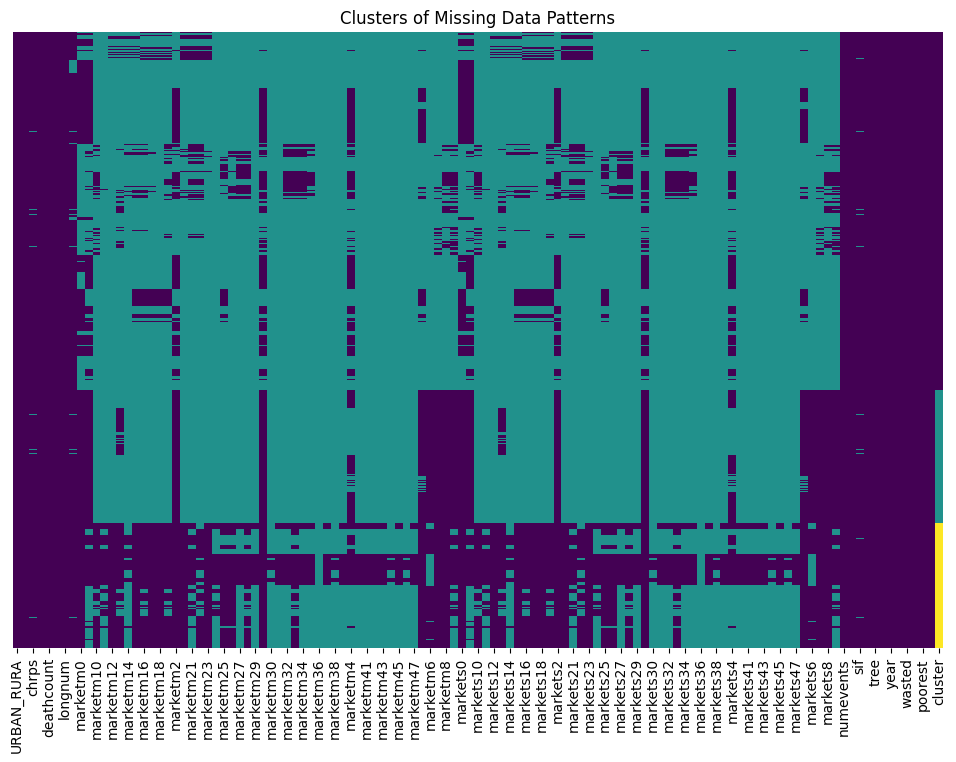

In [16]:
clusters = cluster_missing_data(df, n_clusters=3)

In [8]:
def count_missing_values_by_category(df, category_column, columns=None):
    """
    Counts the missing values in a DataFrame grouped by a specified categorical column
    and calculates the percentage of missing values for each category.

    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - category_column (str): The name of the categorical column to group the data by.
    - columns (list of str, optional): A list of column names to check for missing values.
      If not provided, all columns will be checked.

    Returns:
    - A DataFrame with categories as the index, the total number of missing values,
      and the percentage of missing values in each category.
    """

    # Check if the category column exists in the DataFrame
    if category_column not in df.columns:
        raise ValueError(f"The column '{category_column}' is not in the DataFrame")

    # If columns are not provided, use all columns in the DataFrame
    if columns is None:
        columns = df.columns

    # Group by the categorical column, count nulls, and sum across the columns for total missing
    missing_counts = df[columns].isnull().groupby(df[category_column]).sum().sum(axis=1)

    # Calculate the total number of entries for each category
    total_counts = df.groupby(category_column).size()

    # Calculate the percentage of missing values for each category
    missing_percentage = (missing_counts / total_counts) * 100

    # Combine counts and percentages into one DataFrame
    missing_summary = pd.DataFrame({
        'total_missing': missing_counts,
        'percentage_missing': missing_percentage
    })

    return missing_summary

# Example usage:
# To count missing values for all columns grouped by 'region'
# count_missing_values_by_category(df, 'region')

# To count missing values for specific columns grouped by 'region'
# count_missing_values_by_category(df, 'region', ['column1', 'column2'])


In [9]:
count_missing_values_by_category(df, 'country')


,total_missing,percentage_missing
country,,
8,11941,5970.500000
Bangladesh,173736,9039.334027
Ethiopia,106205,6037.805571
Ghana,8116,989.756098
Guatemala,68987,8601.870324
Honduras,95400,8405.286344
Kenya,151847,7634.338864
Mali,52048,6401.968020
Nepal,84734,9240.348964


In [11]:
def drop_rows_with_values(df, column, values_to_drop):
    """
    Drops rows from a DataFrame where the specified column contains any of the given values.

    Parameters:
    - df (pd.DataFrame): The DataFrame from which to drop rows.
    - column (str): The name of the column to check for the specified values.
    - values_to_drop (list): A list of values; rows with any of these values in the specified column will be dropped.

    Returns:
    - pd.DataFrame: A DataFrame with the specified rows dropped.
    """

    # Check if the column exists in the DataFrame
    if column not in df.columns:
        raise ValueError(f"The column '{column}' is not in the DataFrame")

    # Check if values_to_drop is a list
    if not isinstance(values_to_drop, list):
        raise TypeError("values_to_drop must be a list")

    # Drop rows that contain any of the values_to_drop in the specified column
    df_filtered = df[~df[column].isin(values_to_drop)]

    return df_filtered

# Example usage:
# To drop rows where the 'country' column is '8'
# df = drop_rows_with_values(df, 'country', ['8'])

# To drop rows where the 'country' column is either '8' or 'Unknown'
# df = drop_rows_with_values(df, 'country', ['8', 'Unknown'])


In [12]:
df = drop_rows_with_values(df, 'country', ['8'])

In [13]:
df

,URBAN_RURA,alt,chrps,country,deathcount,latnum,longnum,lst,marketm0,marketm1,...,sif,slope,tree,tt00_500k,year,stunted,wasted,healthy,poorest,underweight_bmi
0,1,5.60252,0.437479,Bangladesh,0,22.981516,90.155785,-1.065822,NaN,NaN,...,-0.745444,0.021781,16.3438,365.67800,2004,0.294118,0.058824,0.941176,0.071429,0.272727
1,1,4.67774,0.447809,Bangladesh,0,22.444431,90.329185,-0.963057,NaN,NaN,...,-0.840625,0.007349,0.0000,397.88600,2004,0.444444,0.000000,1.000000,0.062500,0.400000
2,1,5.14527,0.453208,Bangladesh,0,22.487263,90.206123,-0.963257,NaN,NaN,...,-0.841667,0.005347,0.0000,344.36600,2004,0.600000,0.050000,0.950000,0.000000,0.354839
3,1,6.17460,0.433324,Bangladesh,0,23.016359,90.192879,-1.074995,NaN,NaN,...,-0.744531,0.027679,16.0333,369.38500,2004,0.500000,0.062500,0.937500,0.062500,0.323529
4,1,5.39076,0.406196,Bangladesh,0,22.952404,90.454414,-1.065344,NaN,NaN,...,-0.748497,0.025029,18.7647,273.92400,2004,0.555556,0.000000,1.000000,0.111111,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333,0,212.91400,0.622106,Nigeria,382,7.368560,3.937503,-0.786959,NaN,NaN,...,-0.413014,0.508662,0.0000,6.60494,2013,0.250000,0.250000,0.750000,0.000000,0.212121
14334,1,392.34100,1.081900,Nigeria,311,8.570109,3.547449,-0.804163,NaN,NaN,...,-0.269682,0.396409,16.6122,271.40400,2013,0.431373,0.176471,0.784314,0.969697,0.347222
14335,1,394.41600,1.080867,Nigeria,311,8.765458,3.603125,-0.780643,NaN,NaN,...,-0.248022,0.527184,15.6757,227.03800,2013,0.217391,0.000000,0.956522,0.000000,0.097561
14336,1,389.46400,1.084190,Nigeria,311,8.660406,3.522780,-0.781408,NaN,NaN,...,-0.257015,0.390382,21.0244,219.00000,2013,0.195122,0.073171,0.926829,0.379310,0.026316


In [14]:
count_missing_values_by_category(df, 'country')

,total_missing,percentage_missing
country,,
Bangladesh,173736,9039.334027
Ethiopia,106205,6037.805571
Ghana,8116,989.756098
Guatemala,68987,8601.870324
Honduras,95400,8405.286344
Kenya,151847,7634.338864
Mali,52048,6401.968020
Nepal,84734,9240.348964
Nigeria,142402,7995.620438
